## Demographic Data In San Bernardino + Riverside

### Race & Housing (Rent/Own)

In [1]:
import requests


In [2]:
import geopandas as gpd
import pandas as pd

### Get 2009 Data on Race from Table B02001

In [3]:
#for SB County
r = requests.get('https://api.census.gov/data/2009/acs/acs5?get=group(B02001),geometry,&for=tract:*&in=state:06&in=county:071')
censusdata = r.json()
#specify column names
column_names = censusdata[0]
data_rows = censusdata[1:]
df_SB_race = pd.DataFrame(data_rows, columns=column_names)


#get it for Riverside
r = requests.get('https://api.census.gov/data/2009/acs/acs5?get=group(B02001),geometry,&for=tract:*&in=state:06&in=county:065')
censusdata = r.json()
#specify column names
column_names = censusdata[0]
data_rows = censusdata[1:]
#create dataframe
df_R_race =  pd.DataFrame(data_rows, columns=column_names)
df_R_race.info


<bound method DataFrame.info of     B02001_001E B02001_001EA B02001_001M B02001_001MA B02001_002E  \
0          9277         None         707         None        6729   
1         12791         None         674         None       11321   
2          8749         None         650         None        6048   
3          6088         None         610         None        5082   
4          8872         None         696         None        6439   
..          ...          ...         ...          ...         ...   
338        5604         None         382         None        4641   
339       10425         None         631         None        8393   
340        4285         None         430         None        2808   
341       19174         None         676         None       14219   
342        3902         None         361         None        3368   

    B02001_002EA B02001_002M B02001_002MA B02001_003E B02001_003EA  ...  \
0           None         754         None         274         No

### Use API to get the 2009 Housing Data (variables 'B19013_001E':'Median HH Income','B25003_001E':'Total Occupied','B25003_002E':'Owner Occupied','B25003_003E':'Renter Occupied')

In [4]:
#get 2009 housing columns
#SB
r = requests.get('https://api.census.gov/data/2009/acs/acs5?get=B19013_001E,B25003_001E,B25003_002E,B25003_003E&for=tract:*&in=state:06&in=county:071')
censusdata = r.json()
#df_SB_house = pd.DataFrame(censusdata)
#specify column names
column_names = censusdata[0]
data_rows = censusdata[1:]
#create dataframe
df_SB_house = pd.DataFrame(data_rows, columns=column_names)
df_SB_house.info



<bound method DataFrame.info of     B19013_001E B25003_001E B25003_002E B25003_003E state county   tract
0         77134        1563        1135         428    06    071  000103
1         99359        1808        1476         332    06    071  000104
2        109018        1782        1449         333    06    071  000105
3        118598        3323        3035         288    06    071  000106
4         93355         893         747         146    06    071  000107
..          ...         ...         ...         ...   ...    ...     ...
239       52159        1282         849         433    06    071  011900
240       53201        3951        2242        1709    06    071  012000
241       47091        4920        3703        1217    06    071  012100
242       30000         710         570         140    06    071  940100
243      126250           4           2           2    06    071  940500

[244 rows x 7 columns]>

In [5]:
#Riverside
r = requests.get('https://api.census.gov/data/2009/acs/acs5?get=B19013_001E,B25003_001E,B25003_002E,B25003_003E&for=tract:*&in=state:06&in=county:065')
censusdata = r.json()
#df_R_house = pd.DataFrame(censusdata)
#specify column names
column_names = censusdata[0]
data_rows = censusdata[1:]
#create dataframe
df_R_house = pd.DataFrame(data_rows, columns=column_names)
df_R_house.info

<bound method DataFrame.info of     B19013_001E B25003_001E B25003_002E B25003_003E state county   tract
0         71775        2809        2174         635    06    065  043223
1        108708        3853        3602         251    06    065  043224
2         69173        2675        2145         530    06    065  043225
3         67813        2182        1986         196    06    065  043304
4         53998        3089        2584         505    06    065  043305
..          ...         ...         ...         ...   ...    ...     ...
338       95990        1621        1381         240    06    065  043218
339       74347        3569        2695         874    06    065  043219
340       50665        1561         526        1035    06    065  043220
341       90652        5712        4635        1077    06    065  043221
342      106098        1234        1169          65    06    065  043222

[343 rows x 7 columns]>

In [6]:
#Join the riverside race and housing data
riverside = pd.merge(df_R_house, df_R_race, on='tract')

In [7]:
#Join the SB race and housing data
SB = pd.merge(df_SB_house, df_SB_race, on='tract')

In [8]:
SB.info

<bound method DataFrame.info of     B19013_001E B25003_001E B25003_002E B25003_003E state_x county_x   tract  \
0         77134        1563        1135         428      06      071  000103   
1         99359        1808        1476         332      06      071  000104   
2        109018        1782        1449         333      06      071  000105   
3        118598        3323        3035         288      06      071  000106   
4         93355         893         747         146      06      071  000107   
..          ...         ...         ...         ...     ...      ...     ...   
239       52159        1282         849         433      06      071  011900   
240       53201        3951        2242        1709      06      071  012000   
241       47091        4920        3703        1217      06      071  012100   
242       30000         710         570         140      06      071  940100   
243      126250           4           2           2      06      071  940500   

    B02

In [9]:
#create a single df for SB & Riverside --> calling it GDF to avoid having to change all the code below, but need to add in geometry column 
gdf = pd.concat([riverside,SB], ignore_index=True)

In [10]:
gdf.info

<bound method DataFrame.info of     B19013_001E B25003_001E B25003_002E B25003_003E state_x county_x   tract  \
0         71775        2809        2174         635      06      065  043223   
1        108708        3853        3602         251      06      065  043224   
2         69173        2675        2145         530      06      065  043225   
3         67813        2182        1986         196      06      065  043304   
4         53998        3089        2584         505      06      065  043305   
..          ...         ...         ...         ...     ...      ...     ...   
582       52159        1282         849         433      06      071  011900   
583       53201        3951        2242        1709      06      071  012000   
584       47091        4920        3703        1217      06      071  012100   
585       30000         710         570         140      06      071  940100   
586      126250           4           2           2      06      071  940500   

    B02

In [11]:
gdf.rename(columns={
                'B19013_001E':'Median HH Income', 'B25003_001E':'Total Occupied','B25003_002E':'Owner Occupied','B25003_003E':'Renter Occupied',
            'B02001_001E': 'Total Pop',
                'B02001_002E':'White alone',
                "B02001_003E": "Black or African American alone", 
                "B02001_004E": "American Indian and Alaska Native alone",
                "B02001_005E": "Asian alone",
                "B02001_006E": "Native Hawaiian and Other Pacific Islander alone",
                "B02001_007E": "Some other race alone",
                "B02001_008E": "Two or more races:",
                "B02001_009E": "Two races including Some other race",
                "B02001_010E": "Two races excluding Some other race, and three or more races"}, inplace=True)

In [12]:
gdf = gdf[['Median HH Income',
 'Total Occupied',
 'Owner Occupied',
 'Renter Occupied',
 'state_x',
 'county_x',
 'tract',
 'Total Pop',
 'White alone',
 'Black or African American alone',
 'American Indian and Alaska Native alone',
 'Asian alone',
 'Native Hawaiian and Other Pacific Islander alone',
 'Some other race alone',
 'Two or more races:',
 'Two races including Some other race',
 'Two races excluding Some other race, and three or more races',
 'GEO_ID',
 'NAME']]

In [13]:
gdf.columns.values.tolist()

['Median HH Income',
 'Total Occupied',
 'Owner Occupied',
 'Renter Occupied',
 'state_x',
 'county_x',
 'tract',
 'Total Pop',
 'White alone',
 'Black or African American alone',
 'American Indian and Alaska Native alone',
 'Asian alone',
 'Native Hawaiian and Other Pacific Islander alone',
 'Some other race alone',
 'Two or more races:',
 'Two races including Some other race',
 'Two races excluding Some other race, and three or more races',
 'GEO_ID',
 'NAME']

In [14]:
int_cols = ['Median HH Income',
 'Total Occupied',
 'Owner Occupied',
 'Renter Occupied',
 'Total Pop',
 'White alone',
 'Black or African American alone',
 'American Indian and Alaska Native alone',
 'Asian alone',
 'Native Hawaiian and Other Pacific Islander alone',
 'Some other race alone',
 'Two or more races:',
 'Two races including Some other race',
 'Two races excluding Some other race, and three or more races']

In [15]:
# Convert columns to integer data type
for column in int_cols:
    gdf[column] = gdf[column].astype(int)

C:\Users\cpugh\AppData\Local\Temp\ipykernel_8660\2575074441.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf[column] = gdf[column].astype(int)


In [16]:
race_cols = [ 'White alone',
 'Black or African American alone',
 'American Indian and Alaska Native alone',
 'Asian alone',
 'Native Hawaiian and Other Pacific Islander alone',
 'Some other race alone',
 'Two or more races:',
 'Two races including Some other race',
 'Two races excluding Some other race, and three or more races']

In [17]:
for col in race_cols:
    gdf["Percent " + col] = (gdf[col]/gdf['Total Pop']) * 100

C:\Users\cpugh\AppData\Local\Temp\ipykernel_8660\2459261709.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf["Percent " + col] = (gdf[col]/gdf['Total Pop']) * 100
C:\Users\cpugh\AppData\Local\Temp\ipykernel_8660\2459261709.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf["Percent " + col] = (gdf[col]/gdf['Total Pop']) * 100
C:\Users\cpugh\AppData\Local\Temp\ipykernel_8660\2459261709.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

In [18]:
gdf = gdf.drop(race_cols, axis=1)

In [19]:
gdf['Percent Owner Occupied'] = (gdf['Owner Occupied']/gdf['Total Occupied']) * 100
gdf['Percent Renter Occupied'] = (gdf['Renter Occupied']/gdf['Total Occupied']) * 100

In [20]:
gdf = gdf.drop(['Total Occupied',
 'Owner Occupied',
 'Renter Occupied',], axis=1)

In [21]:
gdf.info

<bound method DataFrame.info of      Median HH Income state_x county_x   tract  Total Pop  \
0               71775      06      065  043223       9277   
1              108708      06      065  043224      12791   
2               69173      06      065  043225       8749   
3               67813      06      065  043304       6088   
4               53998      06      065  043305       8872   
..                ...     ...      ...     ...        ...   
582             52159      06      071  011900       4032   
583             53201      06      071  012000      12026   
584             47091      06      071  012100      14280   
585             30000      06      071  940100       1330   
586            126250      06      071  940500         19   

                   GEO_ID                                               NAME  \
0    1400000US06065043223  Census Tract 432.23, Riverside County, California   
1    1400000US06065043224  Census Tract 432.24, Riverside County, Californi

## Income

In [22]:
#Household income = table B19001

#for SB County
r = requests.get('https://api.census.gov/data/2009/acs/acs5?get=group(B19001),geometry,&for=tract:*&in=state:06&in=county:071')
censusdata = r.json()
#specify column names
column_names = censusdata[0]
data_rows = censusdata[1:]
SB_HI = pd.DataFrame(data_rows, columns=column_names)
SB_HI.head(3)

,B19001_001E,B19001_001EA,B19001_001M,B19001_001MA,B19001_002E,B19001_002EA,B19001_002M,B19001_002MA,B19001_003E,B19001_003EA,...,B19001_016MA,B19001_017E,B19001_017EA,B19001_017M,B19001_017MA,GEO_ID,NAME,state,county,tract
0,1563,None,101,None,52,None,48,None,29,None,...,None,142,None,72,None,1400000US06071000103,"Census Tract 1.03, San Bernardino County, Cali...",06,071,000103
1,1808,None,51,None,39,None,47,None,15,None,...,None,233,None,84,None,1400000US06071000104,"Census Tract 1.04, San Bernardino County, Cali...",06,071,000104
2,1782,None,76,None,93,None,74,None,0,None,...,None,258,None,73,None,1400000US06071000105,"Census Tract 1.05, San Bernardino County, Cali...",06,071,000105


In [23]:
#get it for Riverside
r = requests.get('https://api.census.gov/data/2009/acs/acs5?get=group(B19001),geometry,&for=tract:*&in=state:06&in=county:065')
censusdata = r.json()
#specify column names
column_names = censusdata[0]
data_rows = censusdata[1:]
#create dataframe
riverside_HI =  pd.DataFrame(data_rows, columns=column_names)
riverside_HI.head(2)

,B19001_001E,B19001_001EA,B19001_001M,B19001_001MA,B19001_002E,B19001_002EA,B19001_002M,B19001_002MA,B19001_003E,B19001_003EA,...,B19001_016MA,B19001_017E,B19001_017EA,B19001_017M,B19001_017MA,GEO_ID,NAME,state,county,tract
0,2809,None,155,None,62,None,48,None,36,None,...,None,170,None,82,None,1400000US06065043223,"Census Tract 432.23, Riverside County, California",06,065,043223
1,3853,None,189,None,13,None,20,None,176,None,...,None,704,None,183,None,1400000US06065043224,"Census Tract 432.24, Riverside County, California",06,065,043224


In [24]:


#Join the SB and Riverside income data
#HI_gdf = pd.merge(riverside_HI,SB_HI)

HI_gdf = pd.concat([riverside_HI,SB_HI], ignore_index=True)

In [25]:
HI_gdf.head(5)

,B19001_001E,B19001_001EA,B19001_001M,B19001_001MA,B19001_002E,B19001_002EA,B19001_002M,B19001_002MA,B19001_003E,B19001_003EA,...,B19001_016MA,B19001_017E,B19001_017EA,B19001_017M,B19001_017MA,GEO_ID,NAME,state,county,tract
0,2809,None,155,None,62,None,48,None,36,None,...,None,170,None,82,None,1400000US06065043223,"Census Tract 432.23, Riverside County, California",06,065,043223
1,3853,None,189,None,13,None,20,None,176,None,...,None,704,None,183,None,1400000US06065043224,"Census Tract 432.24, Riverside County, California",06,065,043224
2,2675,None,168,None,53,None,52,None,155,None,...,None,105,None,74,None,1400000US06065043225,"Census Tract 432.25, Riverside County, California",06,065,043225
3,2182,None,138,None,110,None,58,None,100,None,...,None,211,None,110,None,1400000US06065043304,"Census Tract 433.04, Riverside County, California",06,065,043304
4,3089,None,215,None,119,None,72,None,166,None,...,None,0,None,132,None,1400000US06065043305,"Census Tract 433.05, Riverside County, California",06,065,043305


In [26]:
#drop extra columns
HI_gdf = HI_gdf[["B19001_001E", "B19001_002E"    ,
                "B19001_003E"     ,
                "B19001_004E"    ,
                "B19001_005E"    ,
                "B19001_006E"     ,
                "B19001_007E"     , 
                "B19001_008E"    ,
                "B19001_009E"   ,
                "B19001_010E" ,
                "B19001_011E" ,
                "B19001_012E",
                "B19001_013E"  ,
                "B19001_014E",
                "B19001_015E"   ,
                "B19001_016E",
                "B19001_017E",
                'tract','GEO_ID']]

In [27]:
 #rename columns
HI_gdf.rename(columns={"B19001_001E":"Total:",       
                "B19001_002E":"<$10,000",       
                "B19001_003E": '$10,000-$14,999',     
                "B19001_004E":'$15,000 - $19,999',     
                "B19001_005E": '$20,000 - $24,999',     
                "B19001_006E":"$25,000 - $29,999",      
                "B19001_007E":"$30,000 - $34,999",       
                "B19001_008E":"$35,000 - $39,999",      
                "B19001_009E":  "$40,000 - $44,999",    
                "B19001_010E":  "$45,000 - $49,999",   
                "B19001_011E":  "$50,000 - $59,999",  
                "B19001_012E":  "$60,000 - $74,999",  
                "B19001_013E":  "$75,000 - $99,999",  
                "B19001_014E": "$100,000 - $124,999",    
                "B19001_015E":"$125,000 - $149,999",     
                "B19001_016E":"$150,000 - $199,999",   
                "B19001_017E": "$200,000 or more"}, inplace=True)

In [28]:
#get col names
#HI_gdf.columns.values.tolist()

In [29]:
#make list of income related cols
cols = [ '<$10,000',
 '$10,000-$14,999',
 '$15,000 - $19,999',
 '$20,000 - $24,999',
 '$25,000 - $29,999',
 '$30,000 - $34,999',
 '$35,000 - $39,999',
 '$40,000 - $44,999',
 '$45,000 - $49,999',
 '$50,000 - $59,999',
 '$60,000 - $74,999',
 '$75,000 - $99,999',
 '$100,000 - $124,999',
 '$125,000 - $149,999',
 '$150,000 - $199,999',
 '$200,000 or more']

In [30]:
#convert to integer
int_cols = ['Total:',
 '<$10,000',
 '$10,000-$14,999',
 '$15,000 - $19,999',
 '$20,000 - $24,999',
 '$25,000 - $29,999',
 '$30,000 - $34,999',
 '$35,000 - $39,999',
 '$40,000 - $44,999',
 '$45,000 - $49,999',
 '$50,000 - $59,999',
 '$60,000 - $74,999',
 '$75,000 - $99,999',
 '$100,000 - $124,999',
 '$125,000 - $149,999',
 '$150,000 - $199,999',
 '$200,000 or more']

for column in int_cols:
    HI_gdf[column] = HI_gdf[column].astype(int)

In [31]:
#get household income percentages for tracts
for col in cols:
    HI_gdf["Percent " + col] = (HI_gdf[col]/HI_gdf['Total:']) * 100

In [32]:
#drop old columns
HI_gdf =  HI_gdf.drop(cols, axis=1)

In [118]:
len(HI_gdf)
                

587

## Education Level

In [34]:
#education level (sex by educational attainment pop 25 years and older)  = B15002 (now B15003 in more recent surveys)

In [35]:
#for SB County
r = requests.get('https://api.census.gov/data/2009/acs/acs5?get=group(B15002),geometry,&for=tract:*&in=state:06&in=county:071')
censusdata = r.json()
#specify column names
column_names = censusdata[0]
data_rows = censusdata[1:]
SB_educ = pd.DataFrame(data_rows, columns=column_names)
SB_educ.head()

,B15002_001E,B15002_001EA,B15002_001M,B15002_001MA,B15002_002E,B15002_002EA,B15002_002M,B15002_002MA,B15002_003E,B15002_003EA,...,B15002_034MA,B15002_035E,B15002_035EA,B15002_035M,B15002_035MA,GEO_ID,NAME,state,county,tract
0,3091,None,273,None,1493,None,205,None,30,None,...,None,10,None,15,None,1400000US06071005300,"Census Tract 53, San Bernardino County, Califo...",06,071,005300
1,2752,None,280,None,1267,None,186,None,0,None,...,None,48,None,59,None,1400000US06071007800,"Census Tract 78, San Bernardino County, Califo...",06,071,007800
2,2584,None,167,None,1264,None,114,None,12,None,...,None,0,None,132,None,1400000US06071010022,"Census Tract 100.22, San Bernardino County, Ca...",06,071,010022
3,6614,None,593,None,3616,None,426,None,58,None,...,None,3,None,5,None,1400000US06071010300,"Census Tract 103, San Bernardino County, Calif...",06,071,010300
4,6291,None,432,None,3117,None,303,None,208,None,...,None,0,None,132,None,1400000US06071001301,"Census Tract 13.01, San Bernardino County, Cal...",06,071,001301


In [36]:
#get it for Riverside
r = requests.get('https://api.census.gov/data/2009/acs/acs5?get=group(B15002),geometry,&for=tract:*&in=state:06&in=county:065')
censusdata = r.json()
#specify column names
column_names = censusdata[0]
data_rows = censusdata[1:]
#create dataframe
riverside_educ =  pd.DataFrame(data_rows, columns=column_names)
riverside_educ.head(2)

,B15002_001E,B15002_001EA,B15002_001M,B15002_001MA,B15002_002E,B15002_002EA,B15002_002M,B15002_002MA,B15002_003E,B15002_003EA,...,B15002_034MA,B15002_035E,B15002_035EA,B15002_035M,B15002_035MA,GEO_ID,NAME,state,county,tract
0,1469,None,162,None,669,None,131,None,55,None,...,None,0,None,132,None,1400000US06065043403,"Census Tract 434.03, Riverside County, California",06,065,043403
1,2760,None,289,None,1534,None,200,None,8,None,...,None,17,None,26,None,1400000US06065046402,"Census Tract 464.02, Riverside County, California",06,065,046402


In [37]:
educ_gdf = pd.concat([riverside_educ,SB_educ], ignore_index=True)

In [38]:
cols_to_keep = ['B15002_001E',
'B15002_003E',
'B15002_004E',
'B15002_005E',
'B15002_006E',
'B15002_007E',
'B15002_008E',
'B15002_009E',
'B15002_010E',
'B15002_011E',
'B15002_012E',
'B15002_013E',
'B15002_014E',
'B15002_015E',
'B15002_016E',
'B15002_017E',
'B15002_018E',
'B15002_020E',
'B15002_021E',
'B15002_022E',
'B15002_023E',
'B15002_024E',
'B15002_025E',
'B15002_026E',
'B15002_027E',
'B15002_028E',
'B15002_029E',
'B15002_030E',
'B15002_031E',
'B15002_032E',
'B15002_033E',
'B15002_034E',
'B15002_035E','GEO_ID', 'NAME','state','county','tract']

In [39]:
educ_gdf = educ_gdf.loc[:, cols_to_keep]

In [40]:
educ_gdf.head()

,B15002_001E,B15002_003E,B15002_004E,B15002_005E,B15002_006E,B15002_007E,B15002_008E,B15002_009E,B15002_010E,B15002_011E,...,B15002_031E,B15002_032E,B15002_033E,B15002_034E,B15002_035E,GEO_ID,NAME,state,county,tract
0,1469,55,23,39,68,17,0,63,60,190,...,103,55,46,0,0,1400000US06065043403,"Census Tract 434.03, Riverside County, California",06,065,043403
1,2760,8,50,38,90,18,61,119,100,401,...,121,40,29,0,17,1400000US06065046402,"Census Tract 464.02, Riverside County, California",06,065,046402
2,1583,31,0,14,0,0,0,74,0,230,...,75,138,34,0,0,1400000US06065040903,"Census Tract 409.03, Riverside County, California",06,065,040903
3,1886,6,4,172,51,72,0,61,68,256,...,48,43,0,8,0,1400000US06065041203,"Census Tract 412.03, Riverside County, California",06,065,041203
4,5795,18,10,20,21,29,0,67,23,628,...,188,447,333,27,13,1400000US06065043808,"Census Tract 438.08, Riverside County, California",06,065,043808


In [41]:
#get male and female columns to sum
male_cols = educ_gdf[[
 'B15002_003E',
'B15002_004E',
'B15002_005E',
'B15002_006E',
'B15002_007E',
'B15002_008E',
'B15002_009E',
'B15002_010E',
'B15002_011E',
'B15002_012E',
'B15002_013E',
'B15002_014E',
'B15002_015E',
'B15002_016E',
'B15002_017E',
'B15002_018E']]
female_cols = educ_gdf[[
'B15002_020E',
'B15002_021E',
'B15002_022E',
'B15002_023E',
'B15002_024E',
'B15002_025E',
'B15002_026E',
'B15002_027E',
'B15002_028E',
'B15002_029E',
'B15002_030E',
'B15002_031E',
'B15002_032E',
'B15002_033E',
'B15002_034E',
'B15002_035E',
]]


In [42]:
#rename columns to match
male_cols.rename(columns={
    'B15002_003E':'B15002_020E',
'B15002_004E':'B15002_021E',
'B15002_005E':'B15002_022E',
'B15002_006E':'B15002_023E',
'B15002_007E':'B15002_024E',
'B15002_008E':'B15002_025E',
'B15002_009E':'B15002_026E',
'B15002_010E':'B15002_027E',
'B15002_011E':'B15002_028E',
'B15002_012E':'B15002_029E',
'B15002_013E':'B15002_030E',
'B15002_014E':'B15002_031E',
'B15002_015E':'B15002_032E',
'B15002_016E':'B15002_033E',
'B15002_017E':'B15002_034E',
'B15002_018E':'B15002_035E'}, inplace=True)

C:\Users\cpugh\AppData\Local\Temp\ipykernel_8660\1756382224.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male_cols.rename(columns={


In [43]:
#convert datatype to int
female_cols = female_cols.astype(int)
#convert datatype to int
male_cols = male_cols.astype(int)

In [44]:
df_sum = male_cols.add(female_cols, fill_value=0)

In [45]:
#add back tract column
df_sum['tract'] = educ_gdf['tract']

In [46]:
df_sum['Total_Educ'] = educ_gdf['B15002_001E']

In [47]:
df_sum.head()

,B15002_020E,B15002_021E,B15002_022E,B15002_023E,B15002_024E,B15002_025E,B15002_026E,B15002_027E,B15002_028E,B15002_029E,B15002_030E,B15002_031E,B15002_032E,B15002_033E,B15002_034E,B15002_035E,tract,Total_Educ
0,63,53,58,99,17,30,132,81,486,114,67,113,84,72,0,0,043403,1469
1,35,99,91,126,36,97,148,138,790,232,524,215,142,43,0,44,046402,2760
2,31,25,84,29,42,86,74,21,366,99,261,128,246,79,12,0,040903,1583
3,12,59,321,51,113,37,131,98,524,56,303,48,107,0,26,0,041203,1886
4,27,22,39,41,65,21,140,94,1676,602,1046,527,890,455,80,70,043808,5795


In [48]:
df_sum.rename(columns={
      'B15002_020E':'No schooling completed',
'B15002_028E':'high school diploma',
'B15002_031E':'Associates degree',
'B15002_032E':'Bachelors degree',
'B15002_033E':'Masters degree',
'B15002_034E':'Professional school degree',
'B15002_035E':'Doctorate degree'
                }, inplace=True)

In [49]:
df_sum.head()

,No schooling completed,B15002_021E,B15002_022E,B15002_023E,B15002_024E,B15002_025E,B15002_026E,B15002_027E,high school diploma,B15002_029E,B15002_030E,Associates degree,Bachelors degree,Masters degree,Professional school degree,Doctorate degree,tract,Total_Educ
0,63,53,58,99,17,30,132,81,486,114,67,113,84,72,0,0,043403,1469
1,35,99,91,126,36,97,148,138,790,232,524,215,142,43,0,44,046402,2760
2,31,25,84,29,42,86,74,21,366,99,261,128,246,79,12,0,040903,1583
3,12,59,321,51,113,37,131,98,524,56,303,48,107,0,26,0,041203,1886
4,27,22,39,41,65,21,140,94,1676,602,1046,527,890,455,80,70,043808,5795


In [50]:
#create col for some school but less than highschool degree
df_sum['less_highschool'] = df_sum.iloc[:,2:8].sum(axis=1)
#create col for some school post highschool but less than secondary degree
df_sum['some_college'] = df_sum.B15002_029E + df_sum.B15002_030E

In [51]:
df_sum.head()

,No schooling completed,B15002_021E,B15002_022E,B15002_023E,B15002_024E,B15002_025E,B15002_026E,B15002_027E,high school diploma,B15002_029E,B15002_030E,Associates degree,Bachelors degree,Masters degree,Professional school degree,Doctorate degree,tract,Total_Educ,less_highschool,some_college
0,63,53,58,99,17,30,132,81,486,114,67,113,84,72,0,0,043403,1469,417,181
1,35,99,91,126,36,97,148,138,790,232,524,215,142,43,0,44,046402,2760,636,756
2,31,25,84,29,42,86,74,21,366,99,261,128,246,79,12,0,040903,1583,336,360
3,12,59,321,51,113,37,131,98,524,56,303,48,107,0,26,0,041203,1886,751,359
4,27,22,39,41,65,21,140,94,1676,602,1046,527,890,455,80,70,043808,5795,400,1648


In [52]:
educ_gdf = df_sum

In [53]:
#educ_gdf.columns.values.tolist()

In [54]:
#drop columns we don't need
educ_gdf = educ_gdf[[
 'Total_Educ',
 'No schooling completed',
 'high school diploma',
 'Associates degree',
 'Bachelors degree',
 'Masters degree',
 'Professional school degree',
 'Doctorate degree',
 'tract',
 'less_highschool',
 'some_college']]

In [55]:
cols =  ['No schooling completed',
 'high school diploma',
 'Associates degree',
 'Bachelors degree',
 'Masters degree',
 'Professional school degree',
 'Doctorate degree',
 'less_highschool',
 'some_college']

In [56]:
int_cols = [ 'Total_Educ','No schooling completed',
 'high school diploma',
 'Associates degree',
 'Bachelors degree',
 'Masters degree',
 'Professional school degree',
 'Doctorate degree',
 'less_highschool',
 'some_college']


In [57]:

# Convert columns to integer data type
for column in int_cols:
    educ_gdf[column] = educ_gdf[column].astype('int64')

C:\Users\cpugh\AppData\Local\Temp\ipykernel_8660\2605885157.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  educ_gdf[column] = educ_gdf[column].astype('int64')


In [58]:
for col in cols:
    educ_gdf["Percent " + col] = (educ_gdf[col]/educ_gdf['Total_Educ']) * 100

C:\Users\cpugh\AppData\Local\Temp\ipykernel_8660\122627141.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  educ_gdf["Percent " + col] = (educ_gdf[col]/educ_gdf['Total_Educ']) * 100
C:\Users\cpugh\AppData\Local\Temp\ipykernel_8660\122627141.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  educ_gdf["Percent " + col] = (educ_gdf[col]/educ_gdf['Total_Educ']) * 100
C:\Users\cpugh\AppData\Local\Temp\ipykernel_8660\122627141.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [59]:
educ_gdf = educ_gdf.drop(cols, axis=1)

In [60]:
educ_gdf.info

<bound method DataFrame.info of      Total_Educ   tract  Percent No schooling completed  \
0          1469  043403                        4.288632   
1          2760  046402                        1.268116   
2          1583  040903                        1.958307   
3          1886  041203                        0.636267   
4          5795  043808                        0.465919   
..          ...     ...                             ...   
582        3651  005400                        2.109011   
583         873  005700                        5.956472   
584        7568  003602                        2.233087   
585        1092  011500                        0.000000   
586         768  010600                        3.776042   

     Percent high school diploma  Percent Associates degree  \
0                      33.083730                   7.692308   
1                      28.623188                   7.789855   
2                      23.120657                   8.085913   
3      

## Occupation

In [61]:
#Table B24080: Sex by Class of Worker for the Civilian Population).


In [62]:
#for SB County
r = requests.get('https://api.census.gov/data/2009/acs/acs5?get=group(B24080),geometry,&for=tract:*&in=state:06&in=county:071')
censusdata = r.json()
#specify column names
column_names = censusdata[0]
data_rows = censusdata[1:]
SB_oc = pd.DataFrame(data_rows, columns=column_names)
SB_oc.head()

,B24080_001E,B24080_001EA,B24080_001M,B24080_001MA,B24080_002E,B24080_002EA,B24080_002M,B24080_002MA,B24080_003E,B24080_003EA,...,B24080_020MA,B24080_021E,B24080_021EA,B24080_021M,B24080_021MA,GEO_ID,NAME,state,county,tract
0,2446,None,243,None,1295,None,180,None,831,None,...,None,0,None,132,None,1400000US06071000103,"Census Tract 1.03, San Bernardino County, Cali...",06,071,000103
1,3286,None,337,None,1819,None,204,None,1346,None,...,None,11,None,17,None,1400000US06071000104,"Census Tract 1.04, San Bernardino County, Cali...",06,071,000104
2,3159,None,356,None,1785,None,167,None,1392,None,...,None,0,None,132,None,1400000US06071000105,"Census Tract 1.05, San Bernardino County, Cali...",06,071,000105
3,6005,None,354,None,3560,None,298,None,2592,None,...,None,28,None,47,None,1400000US06071000106,"Census Tract 1.06, San Bernardino County, Cali...",06,071,000106
4,1476,None,165,None,819,None,89,None,605,None,...,None,0,None,132,None,1400000US06071000107,"Census Tract 1.07, San Bernardino County, Cali...",06,071,000107


In [63]:
#get it for Riverside
r = requests.get('https://api.census.gov/data/2009/acs/acs5?get=group(B24080),geometry,&for=tract:*&in=state:06&in=county:065')
censusdata = r.json()
#specify column names
column_names = censusdata[0]
data_rows = censusdata[1:]
#create dataframe
riverside_oc =  pd.DataFrame(data_rows, columns=column_names)
riverside_oc.head(2)

,B24080_001E,B24080_001EA,B24080_001M,B24080_001MA,B24080_002E,B24080_002EA,B24080_002M,B24080_002MA,B24080_003E,B24080_003EA,...,B24080_020MA,B24080_021E,B24080_021EA,B24080_021M,B24080_021MA,GEO_ID,NAME,state,county,tract
0,4060,None,337,None,2205,None,257,None,1540,None,...,None,0,None,132,None,1400000US06065043223,"Census Tract 432.23, Riverside County, California",06,065,043223
1,5284,None,347,None,3099,None,242,None,2023,None,...,None,15,None,24,None,1400000US06065043224,"Census Tract 432.24, Riverside County, California",06,065,043224


In [64]:
oc_gdf = pd.concat([riverside_oc,SB_oc], ignore_index=True)

In [65]:
#get male and female columns to sum
male_cols = oc_gdf[[
 'B24080_003E',
 'B24080_004E',
 'B24080_005E',
 'B24080_006E',
 'B24080_007E',
 'B24080_008E',
 'B24080_009E',
 'B24080_010E',
 'B24080_011E']]
female_cols = oc_gdf[[
 'B24080_013E',
 'B24080_014E',
 'B24080_015E',
 'B24080_016E',
 'B24080_017E',
 'B24080_018E',
 'B24080_019E',
 'B24080_020E',
 'B24080_021E',
]]


In [66]:
#rename columns to match
male_cols.rename(columns={
                "B24080_003E":  "Private for-profit wage and salary workers:",
                "B24080_004E": "Employee of private company workers",
                "B24080_005E":"Self-employed in own incorporated business workers",
                "B24080_006E": "Private not-for-profit wage and salary workers",
                "B24080_007E": "Local government workers",
                "B24080_008E": "State government workers",
                "B24080_009E": "Federal government workers",
                "B24080_010E":  "Self-employed in own not incorporated business workers",
                "B24080_011E": "Unpaid family workers"}, inplace=True)
female_cols.rename(columns={     
                "B24080_013E": "Private for-profit wage and salary workers:", 
                "B24080_014E": "Employee of private company workers", 
                "B24080_015E":"Self-employed in own incorporated business workers",
                "B24080_016E": "Private not-for-profit wage and salary workers",
                "B24080_017E": "Local government workers",
                "B24080_018E": "State government workers", 
                "B24080_019E": "Federal government workers",
                "B24080_020E":"Self-employed in own not incorporated business workers",  
                "B24080_021E": "Unpaid family workers"}, inplace=True)

C:\Users\cpugh\AppData\Local\Temp\ipykernel_8660\2738484696.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male_cols.rename(columns={
C:\Users\cpugh\AppData\Local\Temp\ipykernel_8660\2738484696.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female_cols.rename(columns={


In [67]:
male_cols.head()

,Private for-profit wage and salary workers:,Employee of private company workers,Self-employed in own incorporated business workers,Private not-for-profit wage and salary workers,Local government workers,State government workers,Federal government workers,Self-employed in own not incorporated business workers,Unpaid family workers
0,1540,1475,65,95,154,38,53,325,0
1,2023,1654,369,83,456,52,60,408,17
2,1810,1743,67,67,202,61,39,164,0
3,839,729,110,69,144,41,0,306,0
4,1001,993,8,34,155,14,80,35,0


In [68]:
female_cols.head()

,Private for-profit wage and salary workers:,Employee of private company workers,Self-employed in own incorporated business workers,Private not-for-profit wage and salary workers,Local government workers,State government workers,Federal government workers,Self-employed in own not incorporated business workers,Unpaid family workers
0,1233,1173,60,32,260,156,0,174,0
1,1395,1191,204,85,277,147,30,236,15
2,1077,1048,29,44,317,54,28,77,0
3,672,657,15,90,167,46,31,110,0
4,686,667,19,110,178,98,25,34,0


In [69]:
#convert datatype to int
female_cols = female_cols.astype(int)

In [70]:
#convert to int
male_cols= male_cols.astype(int)

In [71]:
#sum to get total
df_sum = male_cols.add(female_cols, fill_value=0)

In [72]:
df_sum.head(4)

,Private for-profit wage and salary workers:,Employee of private company workers,Self-employed in own incorporated business workers,Private not-for-profit wage and salary workers,Local government workers,State government workers,Federal government workers,Self-employed in own not incorporated business workers,Unpaid family workers
0,2773,2648,125,127,414,194,53,499,0
1,3418,2845,573,168,733,199,90,644,32
2,2887,2791,96,111,519,115,67,241,0
3,1511,1386,125,159,311,87,31,416,0


In [73]:
#add back tract column
df_sum['tract'] = oc_gdf['tract']

In [74]:
df_sum.head(1)

,Private for-profit wage and salary workers:,Employee of private company workers,Self-employed in own incorporated business workers,Private not-for-profit wage and salary workers,Local government workers,State government workers,Federal government workers,Self-employed in own not incorporated business workers,Unpaid family workers,tract
0,2773,2648,125,127,414,194,53,499,0,043223


In [75]:
#merge to get back geometries
oc_gdf = pd.merge(df_sum,oc_gdf,on='tract')

In [76]:
oc_gdf.head(1)

,Private for-profit wage and salary workers:,Employee of private company workers,Self-employed in own incorporated business workers,Private not-for-profit wage and salary workers,Local government workers,State government workers,Federal government workers,Self-employed in own not incorporated business workers,Unpaid family workers,tract,...,B24080_020M,B24080_020MA,B24080_021E,B24080_021EA,B24080_021M,B24080_021MA,GEO_ID,NAME,state,county
0,2773,2648,125,127,414,194,53,499,0,043223,...,108,None,0,None,132,None,1400000US06065043223,"Census Tract 432.23, Riverside County, California",06,065


In [77]:
#rename total workers column
oc_gdf.rename(columns={"B24080_001E": "Total Workers:"}, inplace=True)

In [78]:
#oc_gdf.columns.values.tolist()

In [79]:
#drop columns
oc_gdf = oc_gdf[['Private for-profit wage and salary workers:',
 'Employee of private company workers',
 'Self-employed in own incorporated business workers',
 'Private not-for-profit wage and salary workers',
 'Local government workers',
 'State government workers',
 'Federal government workers',
 'Self-employed in own not incorporated business workers',
 'Unpaid family workers',
                 "Total Workers:",
 'GEO_ID','tract']]

In [80]:

# Convert columns to integer data type

int_cols = [  "Total Workers:",'Private for-profit wage and salary workers:',
 'Employee of private company workers',
 'Self-employed in own incorporated business workers',
 'Private not-for-profit wage and salary workers',
 'Local government workers',
 'State government workers',
 'Federal government workers',
 'Self-employed in own not incorporated business workers',
 'Unpaid family workers']

for column in int_cols:
    oc_gdf[column] = oc_gdf[column].astype('int64')

In [109]:
len(oc_gdf)

599

In [82]:
#get percentages
cols = [ 'Private for-profit wage and salary workers:',
 'Employee of private company workers',
 'Self-employed in own incorporated business workers',
 'Private not-for-profit wage and salary workers',
 'Local government workers',
 'State government workers',
 'Federal government workers',
 'Self-employed in own not incorporated business workers',
 'Unpaid family workers']

for col in cols:
    oc_gdf["Percent " + col] = (oc_gdf[col]/oc_gdf['Total Workers:']) * 100

In [83]:
#drop columns
oc_gdf = oc_gdf.drop(cols, axis=1)



In [84]:
##Percent Private for-profit wage and salary workers = employee of private company + self-employed  - dropping
oc_gdf = oc_gdf.drop(columns=['Percent Private for-profit wage and salary workers:'], axis=1)

In [85]:
len(oc_gdf)

599

In [114]:
oc_gdf = oc_gdf.drop_duplicates(subset=['GEO_ID'])

## Joining all the dataframes

In [119]:
#oc_gdf + educ_gdf + HI_gdf + gdf

census_df = pd.merge(gdf,HI_gdf, on = 'GEO_ID',how='inner')



In [120]:
len(census_df)

587

In [124]:
census_df.head()

,Median HH Income,state_x,county_x,tract_x,Total Pop,GEO_ID,NAME,Percent White alone,Percent Black or African American alone,Percent American Indian and Alaska Native alone,...,"Percent $35,000 - $39,999","Percent $40,000 - $44,999","Percent $45,000 - $49,999","Percent $50,000 - $59,999","Percent $60,000 - $74,999","Percent $75,000 - $99,999","Percent $100,000 - $124,999","Percent $125,000 - $149,999","Percent $150,000 - $199,999","Percent $200,000 or more"
0,71775,06,065,043223,9277,1400000US06065043223,"Census Tract 432.23, Riverside County, California",72.534224,2.953541,3.859006,...,1.423994,3.951584,5.339979,5.553578,10.110360,13.492346,14.097544,10.466358,4.449982,6.051976
1,108708,06,065,043224,12791,1400000US06065043224,"Census Tract 432.24, Riverside County, California",88.507544,1.852865,0.508170,...,2.180119,1.323644,1.998443,3.607579,8.590709,16.688295,8.642616,9.317415,18.375292,18.271477
2,69173,06,065,043225,8749,1400000US06065043225,"Census Tract 432.25, Riverside County, California",69.127900,4.069036,0.000000,...,4.224299,4.224299,1.607477,10.467290,14.579439,17.009346,14.878505,4.785047,5.383178,3.925234
3,67813,06,065,043304,6088,1400000US06065043304,"Census Tract 433.04, Riverside County, California",83.475690,0.344941,0.558476,...,2.428964,3.345555,1.604033,7.516040,6.416132,11.824015,9.807516,7.974335,9.624198,9.670027
4,53998,06,065,043305,8872,1400000US06065043305,"Census Tract 433.05, Riverside County, California",72.576646,5.094680,1.048242,...,7.154419,5.212043,3.528650,10.877307,16.704435,14.535448,7.542894,3.431531,2.622208,0.000000


In [125]:
census_df = pd.merge(census_df,educ_gdf,on = 'GEO_ID',how='inner')

KeyError: 'GEO_ID'

In [89]:
len(census_df)

623

In [90]:
census_df = pd.merge(census_df,oc_gdf,on = 'tract',how='inner')

In [91]:
len(census_df)

767

In [92]:
census_df.rename(columns={"Total Workers:":"Total Workers"}, inplace=True)

In [93]:
census_df_2009 = census_df

In [94]:
census_df_2009.head()

,Median HH Income,state_x,county_x,tract,Total Pop,GEO_ID_x,NAME,Percent White alone,Percent Black or African American alone,Percent American Indian and Alaska Native alone,...,Total Workers,GEO_ID,Percent Employee of private company workers,Percent Self-employed in own incorporated business workers,Percent Private not-for-profit wage and salary workers,Percent Local government workers,Percent State government workers,Percent Federal government workers,Percent Self-employed in own not incorporated business workers,Percent Unpaid family workers
0,71775,06,065,043223,9277,1400000US06065043223,"Census Tract 432.23, Riverside County, California",72.534224,2.953541,3.859006,...,4060,1400000US06065043223,65.221675,3.078818,3.128079,10.197044,4.778325,1.305419,12.290640,0.000000
1,108708,06,065,043224,12791,1400000US06065043224,"Census Tract 432.24, Riverside County, California",88.507544,1.852865,0.508170,...,5284,1400000US06065043224,53.841787,10.844058,3.179410,13.872067,3.766086,1.703255,12.187737,0.605602
2,69173,06,065,043225,8749,1400000US06065043225,"Census Tract 432.25, Riverside County, California",69.127900,4.069036,0.000000,...,3940,1400000US06065043225,70.837563,2.436548,2.817259,13.172589,2.918782,1.700508,6.116751,0.000000
3,67813,06,065,043304,6088,1400000US06065043304,"Census Tract 433.04, Riverside County, California",83.475690,0.344941,0.558476,...,2515,1400000US06065043304,55.109344,4.970179,6.322068,12.365805,3.459245,1.232604,16.540755,0.000000
4,53998,06,065,043305,8872,1400000US06065043305,"Census Tract 433.05, Riverside County, California",72.576646,5.094680,1.048242,...,2450,1400000US06065043305,67.755102,1.102041,5.877551,13.591837,4.571429,4.285714,2.816327,0.000000


### Import geometries



In [106]:
#remove the first 9 characters from GEOID
census_df_2009['GEO_ID'] = census_df_2009['GEO_ID'].str.slice(9)

In [107]:
#read in shapefile
tract_geo= gpd.read_file('C:\\Users\\cpugh\\OneDrive\\Documents\\GitHub\\uds project\\group repo\\uds-warehouse-project\\data\\Tract Shapefiles\\cb_2022_06_tract_500k\\cb_2022_06_tract_500k.shp')

In [108]:
#drop other columns
tract_geo = tract_geo[['GEOID', 'geometry']]

In [98]:
#rename key
tract_geo = tract_geo.rename(columns={'GEOID':'GEO_ID'})

In [99]:
#merge
census_df_2009 = gpd.merge(census_df_2009,tract_geo,on='GEO_ID')

In [100]:
#create gdf
census_gdf_2009 = gpd.GeoDataFrame(census_df_2009,geometry='geometry',crs=tract_geo.crs)

In [103]:
len(census_gdf_2009)

386

<Axes: >

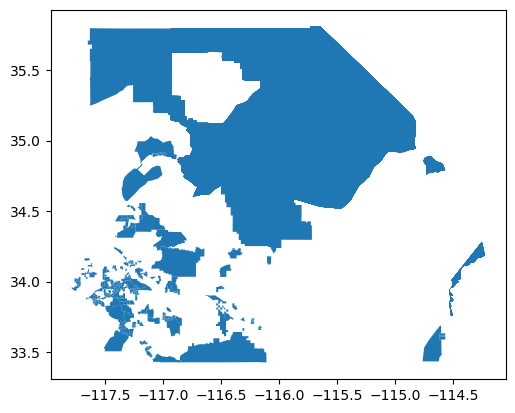

In [104]:
census_gdf_2009.plot()